# IDE Setup

In [18]:
import sys
# sys.path.append('/Users/sambong/pjts/career')
sorted(sys.path)

['',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/Users/sambong/.ipython',
 '/Users/sambong/libs/idebug',
 '/Users/sambong/libs/idebug',
 '/Users/sambong/libs/ilib',
 '/Users/sambong/libs/ilib',
 '/Users/sambong/pjts/career',
 '/Users/sambong/pjts/career',
 '/Users/sambong/pjts/career',
 '/Users/sambong/pjts/career/env/lib/python3.7',
 '/Users/sambong/pjts/career/env/lib/python3.7/lib-dynload',
 '/Users/sambong/pjts/career/env/lib/python3.7/site-packages',
 '/Users/sambong/pjts/career/env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/sambong/pjts/career/env/lib/python37.zip',
 '/Users/sambong/pjts/career/jupyter/linkedin']

In [26]:
from career.linkedin import jobs
from career import models, PJT_PATH
import pandas as pd
import matplotlib
%matplotlib inline
DATA_PATH = f"{PJT_PATH}/career/data/linkedin/jobs"

# Reload

In [36]:
import importlib
importlib.reload(models)
importlib.reload(jobs)

<module 'career.linkedin.jobs' from '/Users/sambong/pjts/career/career/linkedin/jobs.py'>

# Initialize

In [37]:
ska = jobs.SkillAnalyzer()

# Skills Analysis

## Data Preparation

In [12]:
freqdf = ska.make_skillfreq_df()

************************************************************
<class 'career.linkedin.jobs.SkillAnalyzer'> | load
 len(docs) : 4707
************************************************************
<class 'career.linkedin.jobs.SkillAnalyzer'> | load
 len(docs) : 4641


### Applicants-Skills 유무로 데이터 분리.

In [19]:
applicant_0 = freqdf.query('applicantskill == 0')
applicant_1 = freqdf.query('applicantskill > 0')

## Data Visualization

#### Bar-Chart

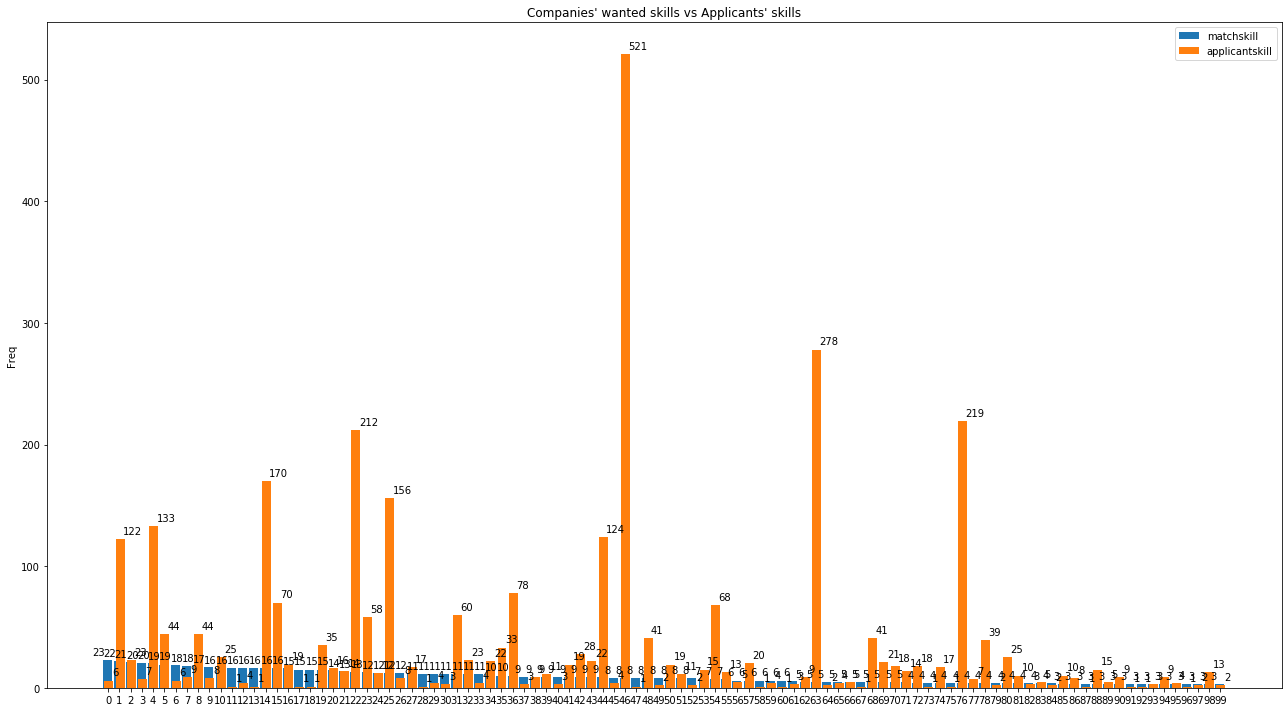

In [23]:
bardf = ska.deindex(df=applicant_1)
title="Companies' wanted skills vs Applicants' skills"
ska.plot_bar(df=bardf[100:200], title=title, ylabel='Freq')

#### Scatter

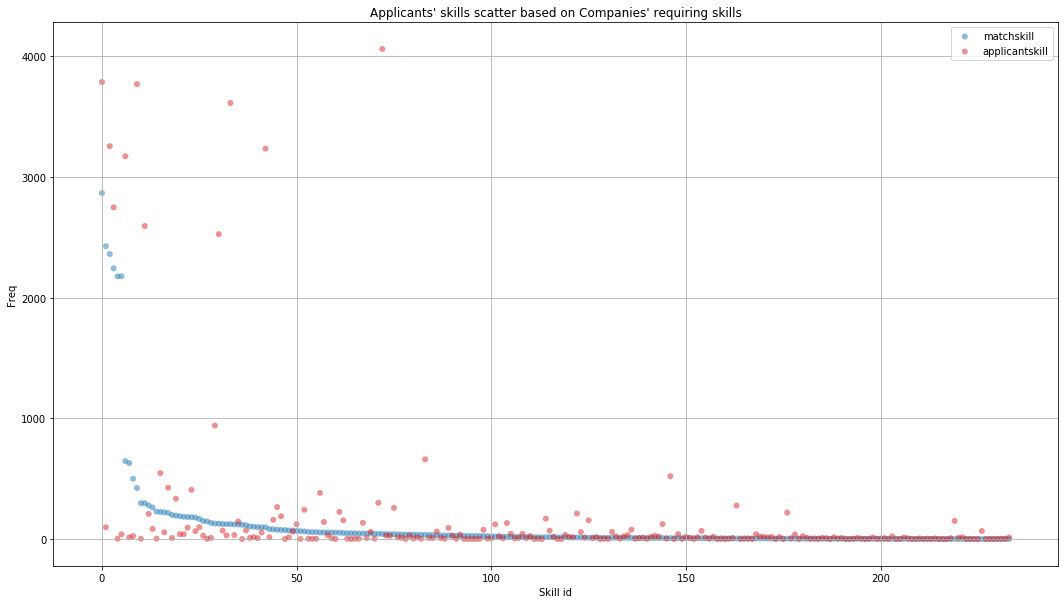

In [21]:
scttdf = ska.deindex(applicant_1)
title = "Applicants' skills scatter based on Companies' requiring skills"
xlabel = "Skill id"
ylabel = "Freq"
ska.plot_scatter(scttdf,title,xlabel,ylabel)

#### 스페인 comunidad 별로 잡포스팅 개수를 분석하는 것도 의미가 있을 듯

#### Compare with my skills.

In [38]:
ska.compare_with_my_skills(freqdf)

/Users/sambong/pjts/career/career/linkedin/jobs.py:1329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  comparedf['myskill'] = comparedf.index


,myskill,required_skill,applicants_skill
0,English,2867,3786
1,Data Analytics,2375,0
2,Data Analysis,2362,3255
3,SQL,423,3769
4,Big Data,298,2594
5,R,217,426
6,JavaScript,195,335
7,Data Visualization,193,0
8,Node.js,183,95
9,Machine Learning,182,408


### 전체 job-postings 에 대해 skills 를 분석.

## Industry Analysis

#### 어떤 산업군에 속한 회사가 얼마만큼의 job-posting을 했는지 보여준다.

In [39]:
indusdf = ska.listcol_valfreq_df(col='industries')

************************************************************
<class 'career.linkedin.jobs.SkillAnalyzer'> | load
 len(docs) : 6887
************************************************************
<class 'career.linkedin.jobs.SkillAnalyzer'> | load
 len(docs) : 6906


In [40]:
indusdf

,freq
industries,
Information Technology & Services,3627
Computer Software,2956
Internet,1569
Staffing & Recruiting,1042
Financial Services,1031
Marketing & Advertising,568
Human Resources,376
Management Consulting,328
Telecommunications,250


In [ ]:
jobfuncdf = ska.listcol_valfreq_df(col='job_functions')

In [41]:
jobfuncdf

,freq
job_functions,
Information Technology,4167
Engineering,2277
Sales,970
Business Development,755
Analyst,672
Consulting,650
Other,618
Marketing,349
Research,315


# Company Info Analysis